# FIRST PART OF THE ASSIGNMENT

(For the other parts look below)

Import libraries.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
import folium
import requests
import random
import geocoder

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline 

Download the dataframe from Wikipedia.

In [2]:
canada_postal_codes = pd.read_html("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050")[0]
canada_postal_codes.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Change the name of the 'Neighbourhood' column to 'Neighborhood'.

In [3]:
canada_postal_codes = canada_postal_codes.rename({'Neighbourhood':'Neighborhood'}, axis=1)
canada_postal_codes.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Ignore cells with a borough that is not assigned.

In [4]:
canada_postal_codes = canada_postal_codes[canada_postal_codes.Borough != 'Not assigned']
canada_postal_codes.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


Combine rows with the same postal code

In [5]:
canada_postal_codes = canada_postal_codes.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(list)
canada_postal_codes = canada_postal_codes.sample(frac = 1).reset_index()
canada_postal_codes['Neighborhood'] = canada_postal_codes['Neighborhood'].str.join(', ')
canada_postal_codes.head()

,Postcode,Borough,Neighborhood
0,M2R,North York,Willowdale West
1,M4M,East Toronto,Studio District
2,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ..."
3,M6J,West Toronto,"Little Portugal, Trinity"
4,M4L,East Toronto,"The Beaches West, India Bazaar"


Assign the borough name, where the neighbouthood is Not assigned.

In [6]:
canada_postal_codes.loc[canada_postal_codes['Neighborhood'] == ('Not assigned'), 'Neighborhood'] = canada_postal_codes['Borough']
canada_postal_codes.head()

,Postcode,Borough,Neighborhood
0,M2R,North York,Willowdale West
1,M4M,East Toronto,Studio District
2,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ..."
3,M6J,West Toronto,"Little Portugal, Trinity"
4,M4L,East Toronto,"The Beaches West, India Bazaar"


Print the number of rows.

In [7]:
canada_postal_codes.shape

(103, 3)

# SECOND PART OF THE ASSIGNMENT (SECOND WAY)

Download the dataframe from Wikipedia.

In [8]:
geospatial_data = pd.read_csv("http://cocl.us/Geospatial_data")
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Rename the colum Postal Code

In [9]:
geospatial_data = geospatial_data.rename({'Postal Code':'Postcode'}, axis=1)
geospatial_data.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
toronto_data = canada_postal_codes.merge(geospatial_data, left_on='Postcode', right_on='Postcode')
toronto_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M2R,North York,Willowdale West,43.782736,-79.442259
1,M4M,East Toronto,Studio District,43.659526,-79.340923
2,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304
3,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
4,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572


In [11]:
toronto_data

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M2R,North York,Willowdale West,43.782736,-79.442259
1,M4M,East Toronto,Studio District,43.659526,-79.340923
2,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304
3,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
4,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
5,M2N,North York,Willowdale South,43.770120,-79.408493
6,M4A,North York,Victoria Village,43.725882,-79.315572
7,M1S,Scarborough,Agincourt,43.794200,-79.262029
8,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509
9,M9N,York,Weston,43.706876,-79.518188


# THIRD PART OF THE ASSIGNMENT

## MAP OF TORONOTO'S NEIGHBORHOODS

Get the geographical coordinates of Toronto.

In [12]:
address = 'Toronto, TO'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Create a map to visualize neighborhoods.

In [13]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## FOURSQUARE

Preparing the connection to Foursquare.

In [14]:
CLIENT_ID = 'WIMVXBBMBOBSEMMTJHRF1HRMZBK1IJFCGFHCLLZLZ05G2F30' # your Foursquare ID
CLIENT_SECRET = 'NQHS0P55SC3NMDQXG4CWEXGRF1VIXZUB3AV5UKX3DGDHQUQW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WIMVXBBMBOBSEMMTJHRF1HRMZBK1IJFCGFHCLLZLZ05G2F30
CLIENT_SECRET:NQHS0P55SC3NMDQXG4CWEXGRF1VIXZUB3AV5UKX3DGDHQUQW


# WORK WITH ONLY ONE NEIGHBORHOOD

Explore first neighbourhood.

Get the neighbourhood's name.

In [15]:
toronto_data.loc[0, 'Neighborhood']

'Willowdale West'

Get the neighbourhood's latitude and longitude values.

In [16]:
neighbourhood_latitude = toronto_data.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = toronto_data.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = toronto_data.loc[0, 'Neighborhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Willowdale West are 43.7827364, -79.4422593.


Create the GET request URL. 

In [17]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WIMVXBBMBOBSEMMTJHRF1HRMZBK1IJFCGFHCLLZLZ05G2F30&client_secret=NQHS0P55SC3NMDQXG4CWEXGRF1VIXZUB3AV5UKX3DGDHQUQW&v=20180605&ll=43.7827364,-79.4422593&radius=500&limit=100'

Send the GET request and examine the results.

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e789d6c949393001b107446'},
 'response': {'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 43.7872364045, 'lng': -79.43603797460023},
   'sw': {'lat': 43.778236395499995, 'lng': -79.44848062539978}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b352657f964a520c42a25e3',
       'name': 'Tov-Li',
       'location': {'address': '5982 Bathurst St.',
        'crossStreet': 'at Rockford Rd.',
        'lat': 43.78421369713337,
        'lng': -79.44609771646198,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.78421369713337,
          'lng': -79.44609771646198}],
        'distance': 349,
        'postalCode': 

Borrow the get_category_type function from the Foursquare lab.

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

clean the json and structure it into a pandas dataframe.

In [20]:
venues = results['response']['groups'][0]['items']
venues

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b352657f964a520c42a25e3',
   'name': 'Tov-Li',
   'location': {'address': '5982 Bathurst St.',
    'crossStreet': 'at Rockford Rd.',
    'lat': 43.78421369713337,
    'lng': -79.44609771646198,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.78421369713337,
      'lng': -79.44609771646198}],
    'distance': 349,
    'postalCode': 'M2R 1Z1',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['5982 Bathurst St. (at Rockford Rd.)',
     'Toronto ON M2R 1Z1',
     'Canada']},
   'categories': [{'id': '4bf58dd8d48988d1ca941735',
     'name': 'Pizza Place',
     'pluralName': 'Pizza Places',
     'shortName': 'Pizza',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'c

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tov-Li,Pizza Place,43.784214,-79.446098
1,Shoppers Drug Mart,Pharmacy,43.784847,-79.446028
2,Dollarama,Discount Store,43.784670,-79.446670
3,Tim Hortons,Coffee Shop,43.780940,-79.444231
4,Price Chopper,Grocery Store,43.783237,-79.446339


Print how many venues were returned by Foursquare.

In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


A function to explore neighbourhoods in Toronto.

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

run the above function on each neighbourhood and create a new dataframe called toronto_venues.

In [24]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Willowdale West
Studio District
Dorset Park, Scarborough Town Centre, Wexford Heights
Little Portugal, Trinity
The Beaches West, India Bazaar
Willowdale South
Victoria Village
Agincourt
Humber Bay, King's Mill Park, Kingsway Park South East, Mimico NE, Old Mill South, The Queensway East, Royal York South East, Sunnylea
Weston
Dovercourt Village, Dufferin
Downsview West
Thorncliffe Park
Del Ray, Keelesdale, Mount Dennis, Silverthorn
Design Exchange, Toronto Dominion Centre
Maryvale, Wexford
Don Mills North
Clairlea, Golden Mile, Oakridge
Northwood Park, York University
Cedarbrae
Islington Avenue
Downsview Central
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Ryerson, Garden District
Harbord, University of Toronto
Westmount
Bayview Village
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Queen's Park
Berczy Park
Caledonia-Fairbanks
Upper Rouge
Hillcrest Village
Christie
Parkwoods
Northwest
Leaside
Davisville
Alderw

Check the size of the resulting dataframe.

In [25]:
print(toronto_venues.shape[0])

2227


Rename columns.

In [26]:
toronto_venues = toronto_venues.rename({'Neighbourhood':'Neighborhood'}, axis=1)
toronto_venues = toronto_venues.rename({'Neighbourhood Latitude':'Neighborhood Latitude'}, axis=1)
toronto_venues = toronto_venues.rename({'Neighbourhood Longitude':'Neighborhood Longitude'}, axis=1)
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Willowdale West,43.782736,-79.442259,Tov-Li,43.784214,-79.446098,Pizza Place
1,Willowdale West,43.782736,-79.442259,Shoppers Drug Mart,43.784847,-79.446028,Pharmacy
2,Willowdale West,43.782736,-79.442259,Dollarama,43.784670,-79.446670,Discount Store
3,Willowdale West,43.782736,-79.442259,Tim Hortons,43.780940,-79.444231,Coffee Shop
4,Willowdale West,43.782736,-79.442259,Price Chopper,43.783237,-79.446339,Grocery Store


Check how many venues were returned for each neighbourhood.

In [27]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,5,5,5,5,5,5
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",4,4,4,4,4,4
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",10,10,10,10,10,10
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Downsview North, Wilson Heights",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,55,55,55,55,55,55


Find out how many unique categories can be curated from all the returned venues.

In [28]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


Analyzie each neighbourhood.

In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']
# move neighbourhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Examine the new dataframe size.

In [31]:
toronto_onehot.shape

(2227, 273)

Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category.

In [32]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Confirm the new size.

In [33]:
toronto_grouped.shape

(100, 273)

Print each neighbourhood along with the top 10 most common venues.

In [34]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0       Coffee Shop  0.07
1        Restaurant  0.05
2              Café  0.04
3   Thai Restaurant  0.04
4               Bar  0.03
5        Steakhouse  0.03
6  Sushi Restaurant  0.02
7               Gym  0.02
8    Clothing Store  0.02
9      Concert Hall  0.02


----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1               Skating Rink   0.2
2             Breakfast Spot   0.2
3                     Lounge   0.2
4             Clothing Store   0.2
5             Massage Studio   0.0
6         Mexican Restaurant   0.0
7              Metro Station   0.0
8                Men's Store   0.0
9   Mediterranean Restaurant   0.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                      venue  freq
0                      Park  0.25
1                    Bakery  0.25
2               Coffee Shop  0.25
3                Playground  0.25
4            Massage Studio  0.00
5    

                      venue  freq
0             Grocery Store  0.25
1        Athletics & Sports  0.25
2              Liquor Store  0.25
3               Coffee Shop  0.25
4            Massage Studio  0.00
5        Mexican Restaurant  0.00
6             Metro Station  0.00
7               Men's Store  0.00
8  Mediterranean Restaurant  0.00
9            Medical Center  0.00


----Downsview West----
                venue  freq
0       Grocery Store  0.33
1                Bank  0.17
2               Hotel  0.17
3       Shopping Mall  0.17
4                Park  0.17
5     Warehouse Store  0.00
6                Lake  0.00
7  Light Rail Station  0.00
8      Lingerie Store  0.00
9        Liquor Store  0.00


----Downsview, North Park, Upwood Park----
                        venue  freq
0                        Park  0.33
1                      Bakery  0.33
2  Construction & Landscaping  0.33
3              Massage Studio  0.00
4          Mexican Restaurant  0.00
5               Metro Station  0

                venue  freq
0          Smoke Shop  0.17
1       Shopping Mall  0.17
2              Bakery  0.17
3      Sandwich Place  0.17
4         Auto Garage  0.17
5      Breakfast Spot  0.17
6              Lounge  0.00
7           Locksmith  0.00
8       Luggage Store  0.00
9  Mac & Cheese Joint  0.00


----Moore Park, Summerhill East----
                      venue  freq
0                       Gym  0.25
1                      Park  0.25
2              Tennis Court  0.25
3                Playground  0.25
4                    Market  0.00
5             Metro Station  0.00
6               Men's Store  0.00
7  Mediterranean Restaurant  0.00
8            Medical Center  0.00
9            Massage Studio  0.00


----North Toronto West----
                 venue  freq
0          Coffee Shop  0.11
1       Clothing Store  0.11
2          Yoga Studio  0.06
3                  Spa  0.06
4  Sporting Goods Shop  0.06
5   Salon / Barbershop  0.06
6   Mexican Restaurant  0.06
7           Restaur

Put that into a pandas dataframe.

Write a function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 5 venues for each neighborhood.

In [36]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_sorted = pd.DataFrame(columns=columns)
toronto_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Steakhouse
1,Agincourt,Skating Rink,Latin American Restaurant,Clothing Store,Breakfast Spot,Lounge
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Coffee Shop,Park,Bakery,Distribution Center
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Discount Store,Beer Store,Sandwich Place
4,"Alderwood, Long Branch",Pizza Place,Skating Rink,Sandwich Place,Pool,Pharmacy


# CLUSTERING

Choose the best number of clusterw with the elbow method.

In [37]:
toronto_clustering = toronto_grouped.drop('Neighborhood', axis = 1) 
inertias = []
for k in range (1, 15):
    kclusters = k
    # run k-means clustering
    toronto_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = toronto_kmeans.labels_
    # Sum of distances of samples to their closest cluster center
    inertia = toronto_kmeans.inertia_
    inertias.append(inertia)
inertias

[20.248295386811087,
 18.362989547128162,
 17.35970120251751,
 16.51738574457705,
 15.757057500002718,
 14.85876779149783,
 14.499228382706455,
 13.30308661017503,
 12.571337318599392,
 11.365909940462192,
 11.615657540323033,
 10.435593001270082,
 10.3812265157306,
 9.950360253567798]

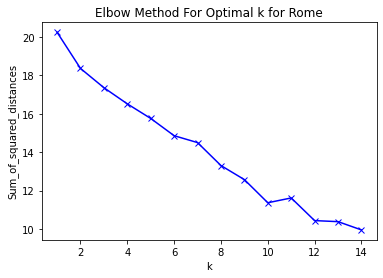

In [38]:
plt.plot(range(1, 15), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for Rome')
plt.show()

We choose K=8, since at this point the curve looks like an elbow.

Run k-means to cluster the neighborhood into 8 clusters.

In [39]:
# set number of clusters
kclusters = 6
toronto_clustering = toronto_grouped.drop('Neighborhood', 1)
# run k-means clustering
toronto_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)
# check cluster labels generated for each row in the dataframe
toronto_kmeans.labels_

array([4, 4, 0, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 0, 4, 0, 4, 4,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 0, 4, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 0, 1, 3, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 3, 2, 4, 3, 4, 3, 3, 0])

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [40]:
# add clustering labels
toronto_sorted.insert(0, 'Cluster Labels', toronto_kmeans.labels_)
toronto_merged = toronto_data
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.tail() # check the last columns

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
98,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4.0,Hotel,Park,Food & Drink Shop,Department Store,Breakfast Spot
99,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,4.0,Pub,Coffee Shop,American Restaurant,Supermarket,Bank
100,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.0,Swim School,Gym / Fitness Center,Park,Bus Line,Women's Store
101,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,4.0,Coffee Shop,Bakery,Pub,Park,Café
102,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4.0,Medical Center,Electronics Store,Spa,Breakfast Spot,Mexican Restaurant


In [41]:
toronto_merged.dropna(inplace = True)
toronto_merged.tail()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
98,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4.0,Hotel,Park,Food & Drink Shop,Department Store,Breakfast Spot
99,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,4.0,Pub,Coffee Shop,American Restaurant,Supermarket,Bank
100,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.0,Swim School,Gym / Fitness Center,Park,Bus Line,Women's Store
101,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,4.0,Coffee Shop,Bakery,Pub,Park,Café
102,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4.0,Medical Center,Electronics Store,Spa,Breakfast Spot,Mexican Restaurant


In [42]:
toronto_merged["Cluster Labels"] = toronto_merged["Cluster Labels"].astype(int)
toronto_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M2R,North York,Willowdale West,43.782736,-79.442259,3,Pizza Place,Grocery Store,Bank,Coffee Shop,Home Service
1,M4M,East Toronto,Studio District,43.659526,-79.340923,4,Café,Coffee Shop,Brewery,American Restaurant,Bakery
2,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,4,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pet Store,Women's Store
3,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,4,Bar,Coffee Shop,Asian Restaurant,Restaurant,Men's Store
4,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,Board Shop,Fish & Chips Shop,Park,Pet Store,Pizza Place


Visualize the resulting clusters.

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e-01, 5.87785252e-01, 9.51056516e-01, 1.00000000e+00],
       [3.00000000e-01, 9.51056516e-01, 8.09016994e-01, 1.00000000e+00],
       [7.00000000e-01, 9.51056516e-01, 5.87785252e-01, 1.00000000e+00],
       [1.00000000e+00, 5.87785252e-01, 3.09016994e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [44]:
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow

['#8000ff', '#1996f3', '#4df3ce', '#b2f396', '#ff964f', '#ff0000']

In [45]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters.

In [46]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
30,York,0,Park,Women's Store,Market,Distribution Center,Department Store
34,North York,0,Park,Food & Drink Shop,Women's Store,Distribution Center,Department Store
42,North York,0,Park,Airport,Women's Store,Dog Run,Department Store
45,Etobicoke,0,River,Park,Women's Store,Distribution Center,Department Store
47,North York,0,Construction & Landscaping,Park,Bakery,Dog Run,Dessert Shop
64,Downtown Toronto,0,Park,Trail,Playground,Dance Studio,Deli / Bodega
73,East York,0,Park,Metro Station,Convenience Store,Deli / Bodega,Department Store
74,North York,0,Park,Convenience Store,Bank,Women's Store,Dessert Shop
78,Central Toronto,0,Trail,Jewelry Store,Park,Sushi Restaurant,Distribution Center
81,Scarborough,0,Playground,Coffee Shop,Park,Bakery,Distribution Center


In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
40,Central Toronto,1,Garden,Women's Store,Distribution Center,Department Store,Dessert Shop


In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,York,2,Convenience Store,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner


In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North York,3,Pizza Place,Grocery Store,Bank,Coffee Shop,Home Service
10,West Toronto,3,Bakery,Pizza Place,Pharmacy,Middle Eastern Restaurant,Supermarket
11,North York,3,Grocery Store,Hotel,Shopping Mall,Park,Bank
13,York,3,Skating Rink,Fast Food Restaurant,Discount Store,Sandwich Place,Dog Run
25,Etobicoke,3,Pizza Place,Middle Eastern Restaurant,Discount Store,Coffee Shop,Sandwich Place
38,Etobicoke,3,Pizza Place,Skating Rink,Sandwich Place,Pool,Pharmacy
41,East York,3,Pizza Place,Pharmacy,Intersection,Breakfast Spot,Bank
54,Etobicoke,3,Grocery Store,Pizza Place,Discount Store,Beer Store,Sandwich Place
58,Scarborough,3,Pizza Place,Noodle House,Pharmacy,Italian Restaurant,Intersection
70,North York,3,Empanada Restaurant,Shopping Mall,Pizza Place,Distribution Center,Deli / Bodega


In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,East Toronto,4,Café,Coffee Shop,Brewery,American Restaurant,Bakery
2,Scarborough,4,Indian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pet Store,Women's Store
3,West Toronto,4,Bar,Coffee Shop,Asian Restaurant,Restaurant,Men's Store
4,East Toronto,4,Board Shop,Fish & Chips Shop,Park,Pet Store,Pizza Place
5,North York,4,Ramen Restaurant,Café,Restaurant,Pizza Place,Coffee Shop
6,North York,4,Coffee Shop,Portuguese Restaurant,Hockey Arena,Financial or Legal Service,Women's Store
7,Scarborough,4,Skating Rink,Latin American Restaurant,Clothing Store,Breakfast Spot,Lounge
8,Etobicoke,4,Baseball Field,Locksmith,Doner Restaurant,Dessert Shop,Dim Sum Restaurant
12,East York,4,Indian Restaurant,Yoga Studio,Liquor Store,Bank,Pizza Place
14,Downtown Toronto,4,Coffee Shop,Café,Hotel,Restaurant,Italian Restaurant


In [51]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
94,North York,5,Cafeteria,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant


# CONLCUSIONS

We have clusterized neoghbprhood in Toronto.
We observe that all the neighborhood near the sea have the same cluster 4, while cluster 3 is typical of the suburbs.
Unfortunately, two custers have only one element.